In [160]:
from utils import load_imagedataset
import torchvision
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from Datasets import SCLDataset, SCLFinetuneDataset

In [161]:
def plot_imgs(imgs):
    fig, ax = plt.subplots(1,8, figsize=(50, 50))
    for i, img in enumerate(imgs):
        if img.shape[0] == 1:
            ax[i].imshow(img.permute(1,2,0), cmap="gray")
        else:
            ax[i].imshow(img.permute(1,2,0))
    fig.show()

def plot_scl_imgs(imgs , mu, sigma):
    x_i, xhat_j, x_j = imgs
    num_imgs = x_i.shape[0]
    fig, ax = plt.subplots(3, num_imgs, figsize=(25, 25))
    for k in range(3):
        for l, img in enumerate(imgs[0]):
            img = img * torch.tensor(sigma)[:, None, None] + torch.tensor(mu)[:, None, None]
            if img.shape[0] == 1:
                ax[k, l].imshow(img.permute(1,2,0), cmap="gray")
            else:
                ax[k, l].imshow(img.permute(1,2,0))
    fig.tight_layout()
    fig.show()

In [162]:
class SCLTrainTransform():
    # augmentations as described in SimCLR paper
    def __init__(self, imgsize, mean, std, s=0.5, gaus_blur=False, num_views=2, p_flip=0.5):
        self.num_views = num_views
        color_jitter = transforms.ColorJitter(
            brightness=0.8*s,
            contrast=0.8*s,
            saturation=0.8*s,
            hue=0.2*s
        )
        transform = [
            transforms.RandomResizedCrop(size=imgsize),  #, scale=(0.14, 1)),
            transforms.RandomHorizontalFlip(p=p_flip),
            transforms.RandomApply([color_jitter], p=0.8),
            transforms.RandomGrayscale(p=0.2)
        ]
        if gaus_blur:
            transform.append(transforms.GaussianBlur(kernel_size=int(imgsize*0.1), sigma=(0.1, 2.0)))
        transform.append(transforms.ToTensor())
        transform.append(transforms.Normalize(mean, std))
        self.transform = transforms.Compose(transform)

    def __call__(self, x):
        return [self.transform(x) for _ in range(self.num_views)] if self.num_views > 1 else self.transform(x)


# CIFAR-10

In [163]:
datasetname = "cifar10"
traindataset, valdataset, testdataset, mean, std, num_classes = load_imagedataset(datasetname, val_split=0.1)

imgsize = 32
s = 0.5
gaus_blur = True
num_views = 1
p_flip = 0.5

dataloader = DataLoader(
    dataset=SCLDataset(
        traindataset, 
        transform=SCLTrainTransform(
            imgsize=imgsize,
            mean=mean,
            std=std,
            s=s,
            gaus_blur=gaus_blur,
            num_views=num_views,
            p_flip=p_flip
        )
    ), 
    batch_size=8, 
    shuffle=True
)

x_i, xhat_j, x_j = next(iter(dataloader))

Files already downloaded and verified
Files already downloaded and verified


/tmp/ipykernel_295268/3821377251.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


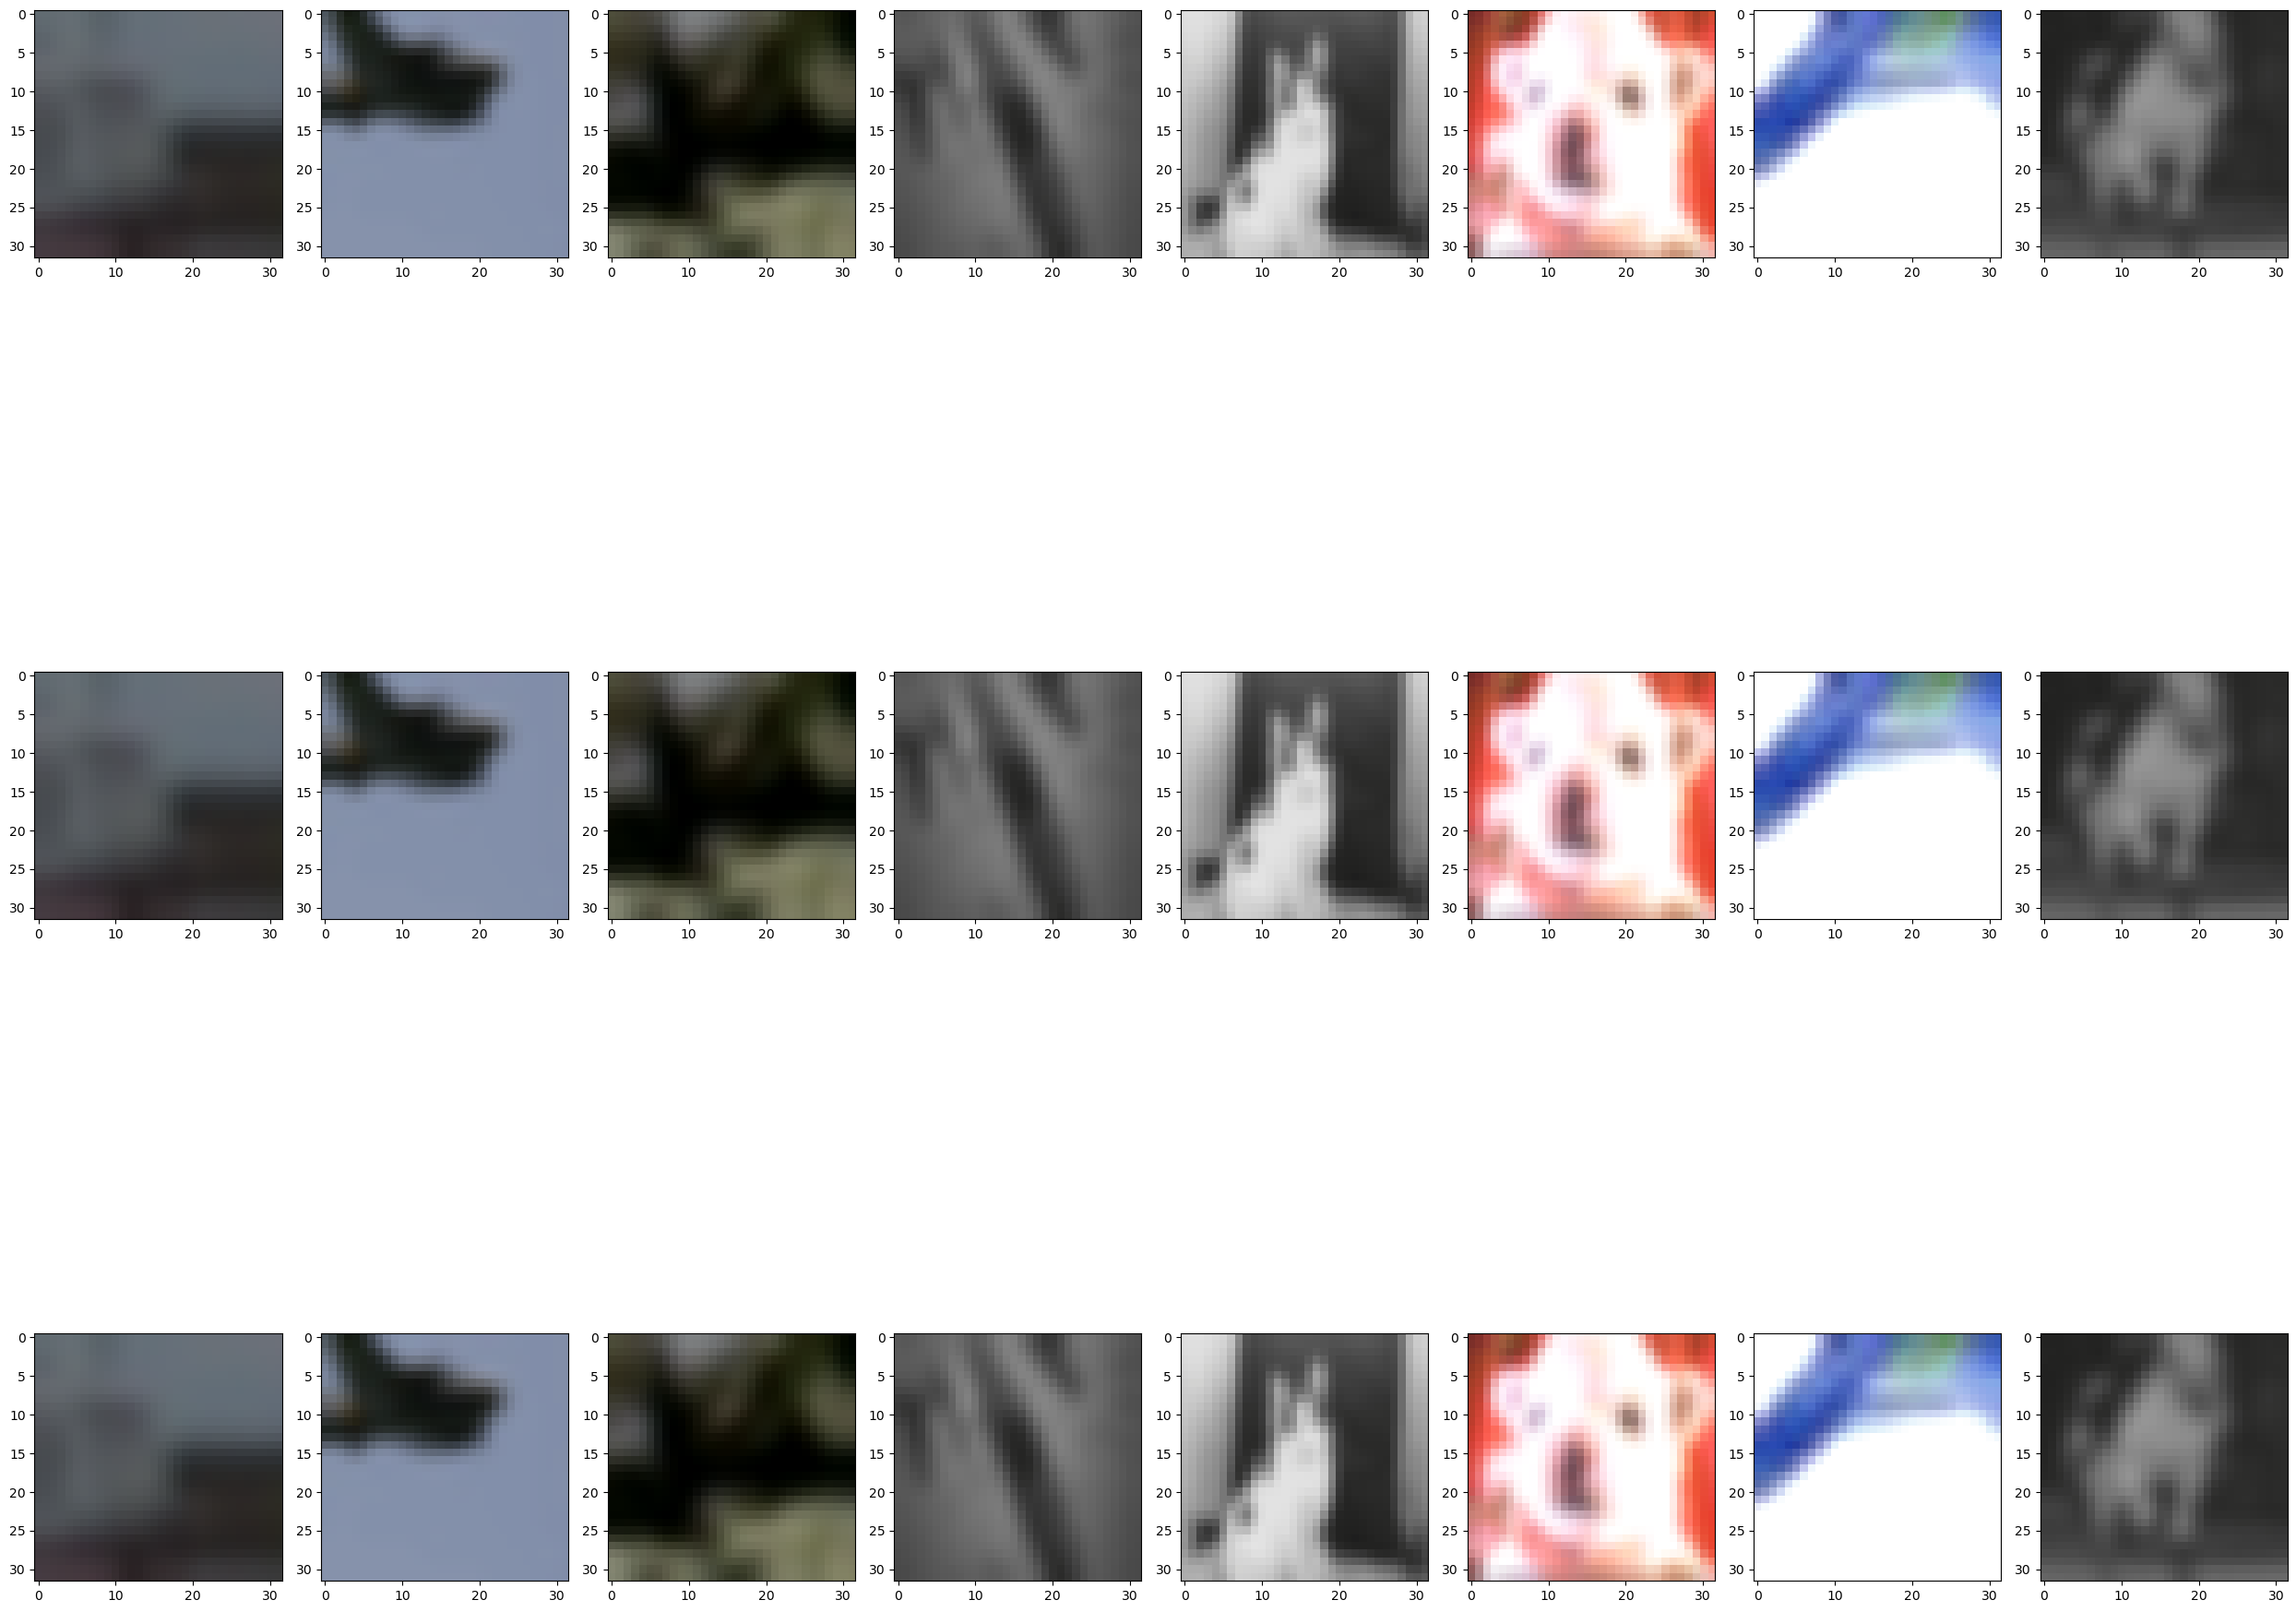

In [164]:
imgs = x_i, xhat_j, x_j
plot_scl_imgs(imgs, mean, std)

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


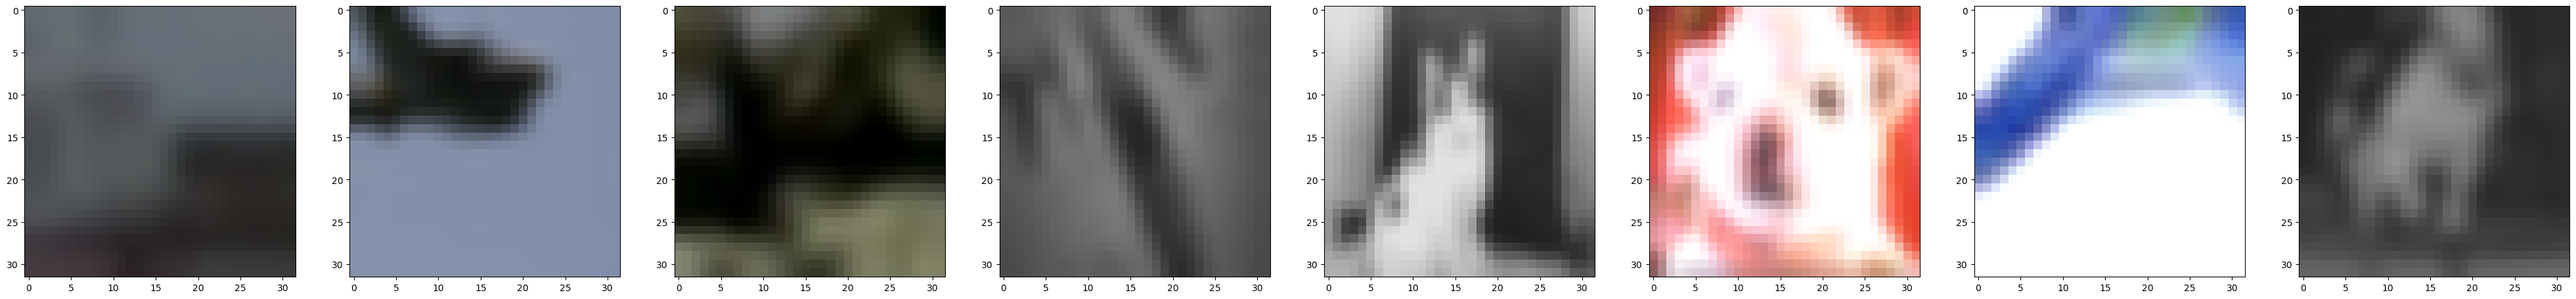

In [165]:
plot_imgs(x_i * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


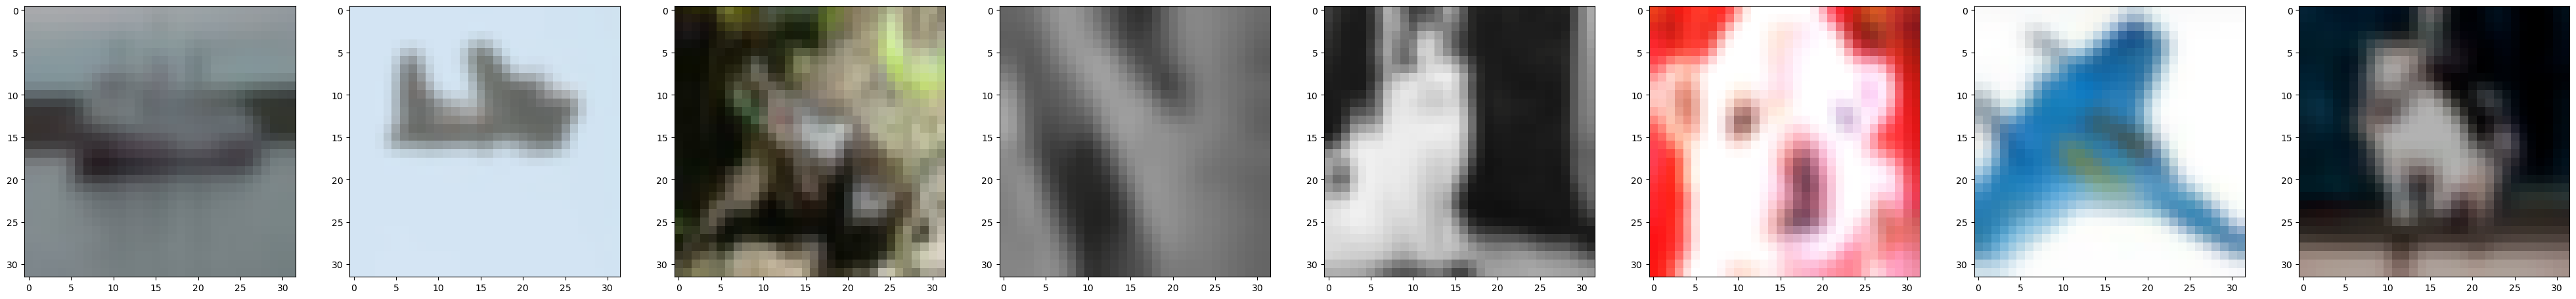

In [166]:
plot_imgs(xhat_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


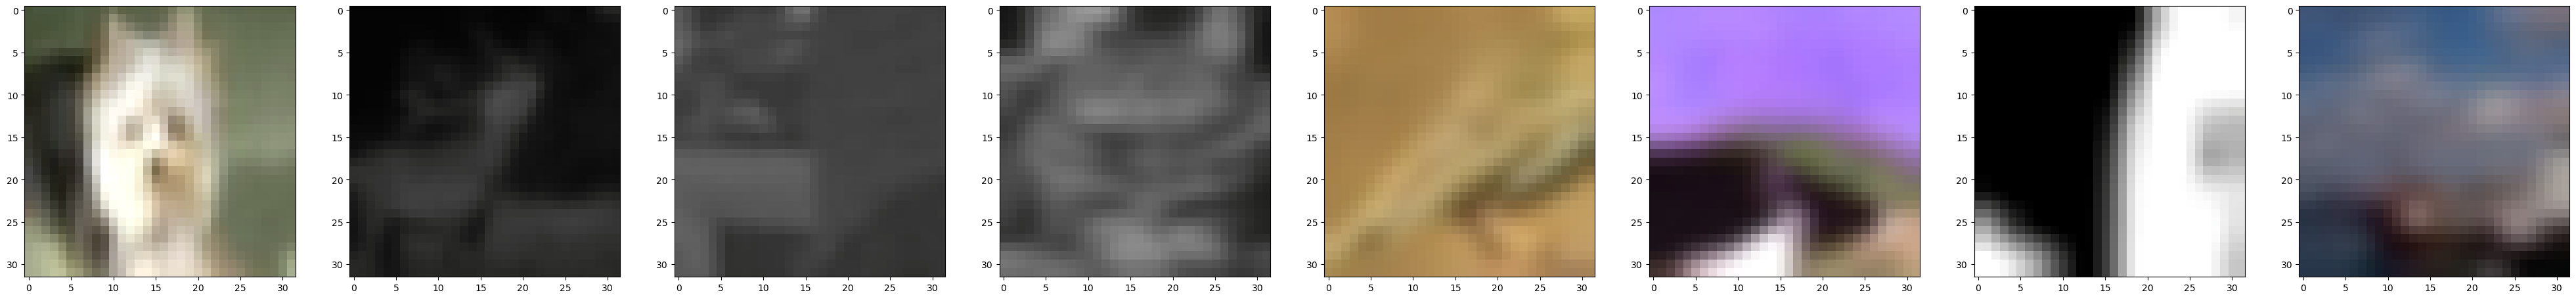

In [167]:
plot_imgs(x_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

# MNIST

In [168]:
datasetname = "mnist"
traindataset, valdataset, testdataset, mean, std, num_classes = load_imagedataset(datasetname, val_split=0.1)

imgsize = 32
s = 0.5
gaus_blur = True
num_views = 1
p_flip = 0.0

dataloader = DataLoader(
    dataset=SCLDataset(
        traindataset,
        transform=SCLTrainTransform(
            imgsize=imgsize,
            mean=mean,
            std=std,
            s=s,
            gaus_blur=gaus_blur,
            num_views=num_views,
            p_flip=p_flip
        )
    ),
    batch_size=8,
    shuffle=True
)

x_i, xhat_j, x_j = next(iter(dataloader))

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


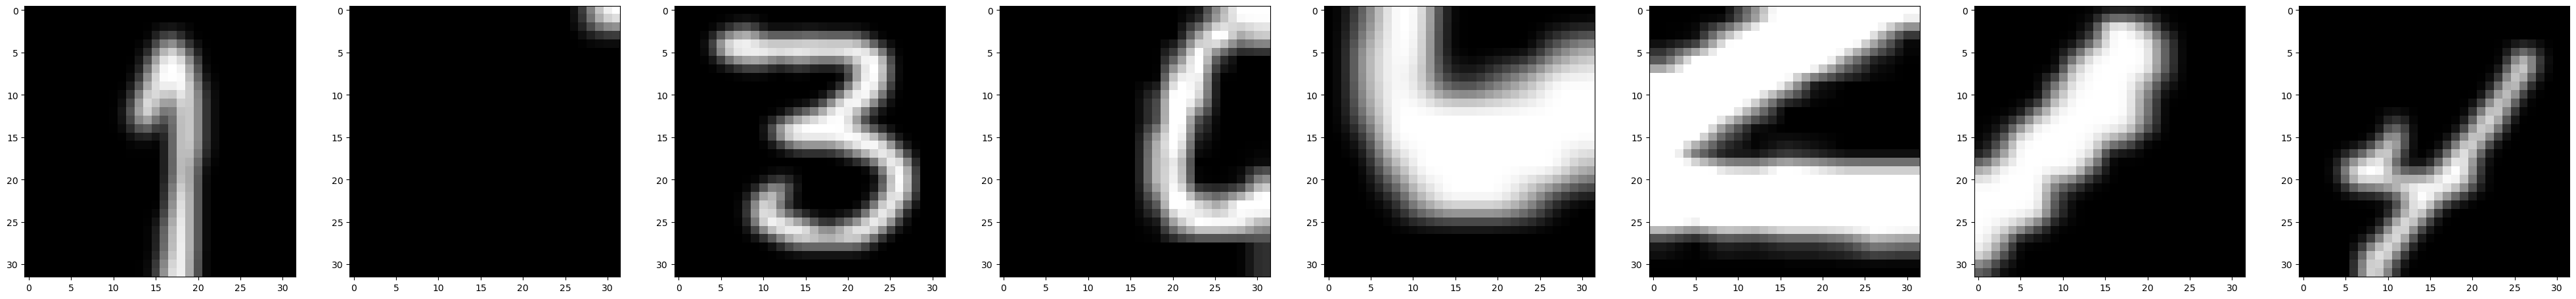

In [169]:
plot_imgs(x_i * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


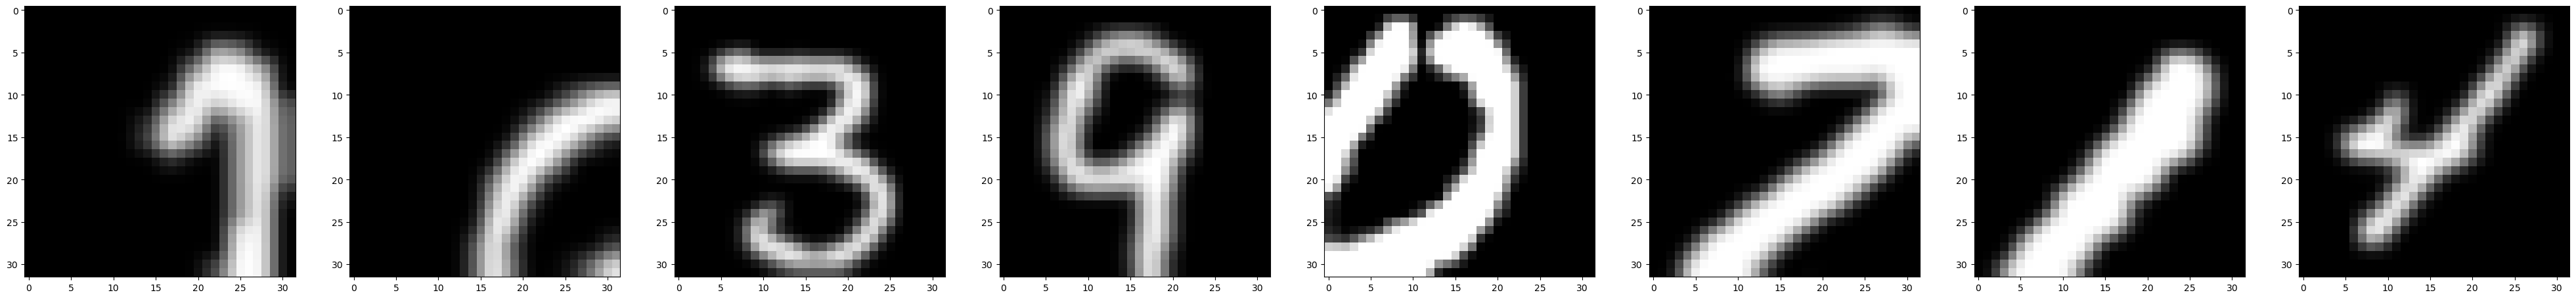

In [170]:
plot_imgs(xhat_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


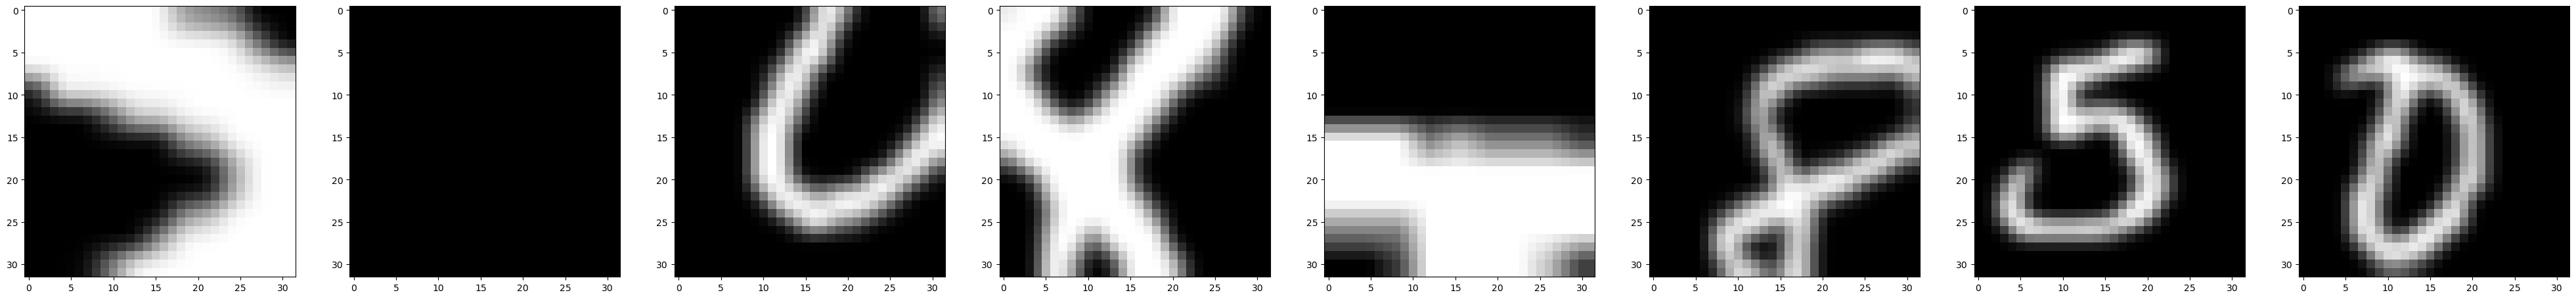

In [171]:
plot_imgs(x_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

In [172]:
datasetname = "fashionmnist"
traindataset, valdataset, testdataset, mean, std, num_classes = load_imagedataset(datasetname, val_split=0.1)

imgsize = 32
s = 0.5
gaus_blur = True
num_views = 1
p_flip = 0.0

dataloader = DataLoader(
    dataset=SCLDataset(
        traindataset,
        transform=SCLTrainTransform(
            imgsize=imgsize,
            mean=mean,
            std=std,
            s=s,
            gaus_blur=gaus_blur,
            num_views=num_views,
            p_flip=p_flip
        )
    ),
    batch_size=8,
    shuffle=True
)

x_i, xhat_j, x_j = next(iter(dataloader))

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


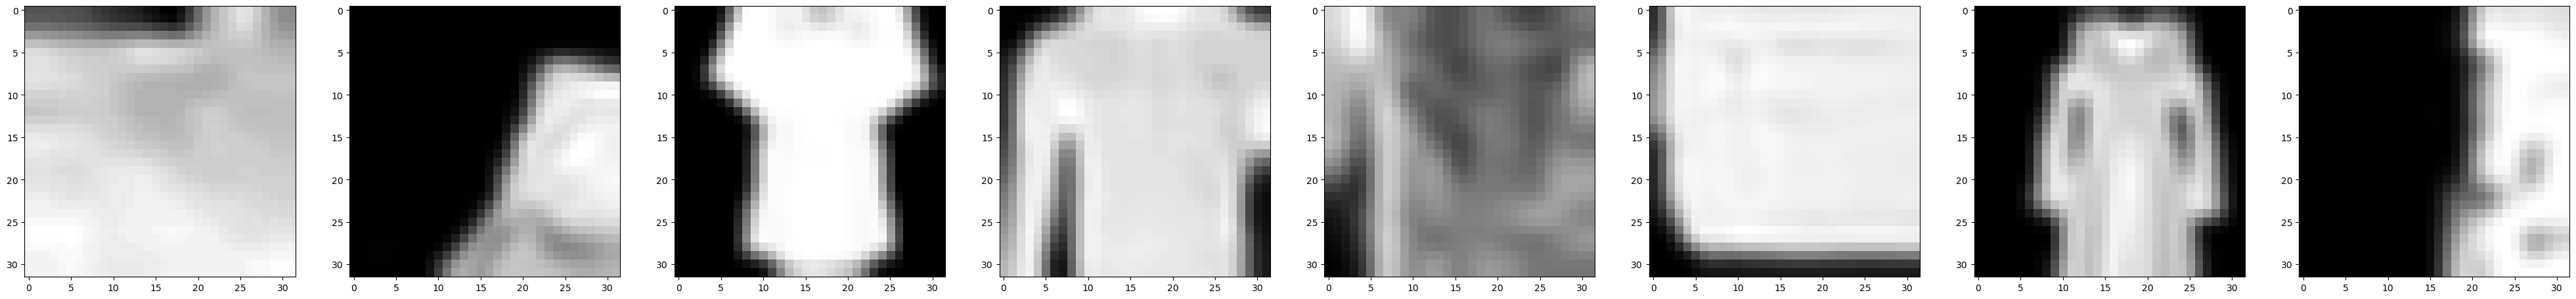

In [173]:
plot_imgs(xhat_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


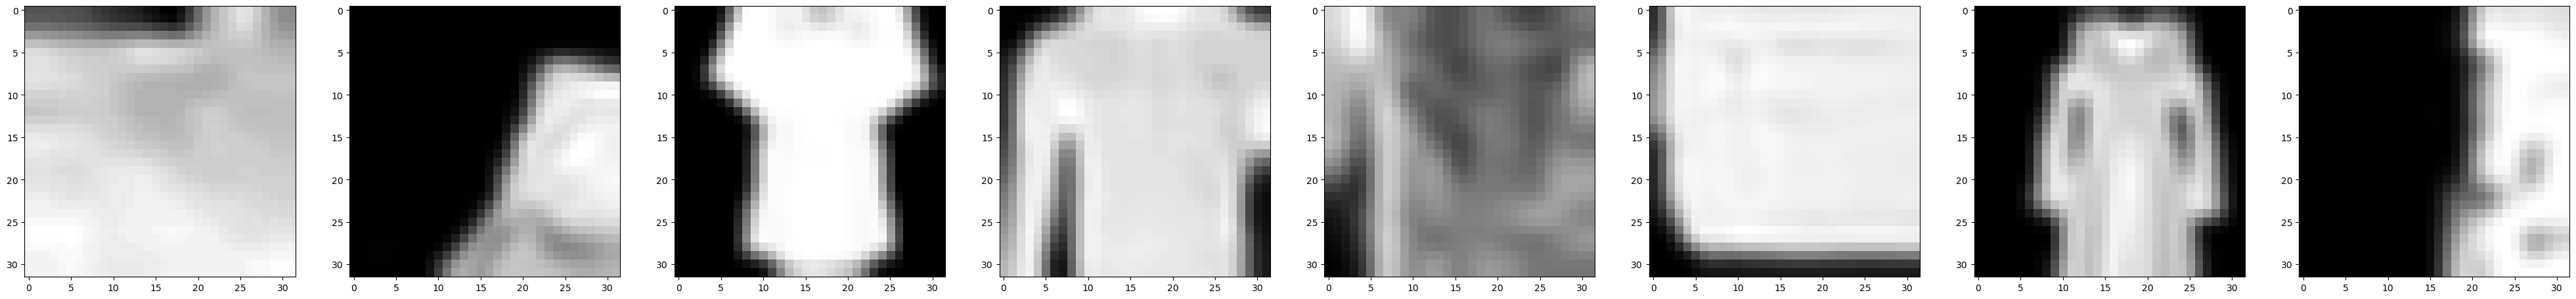

In [174]:
plot_imgs(xhat_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])

/tmp/ipykernel_295268/3821377251.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


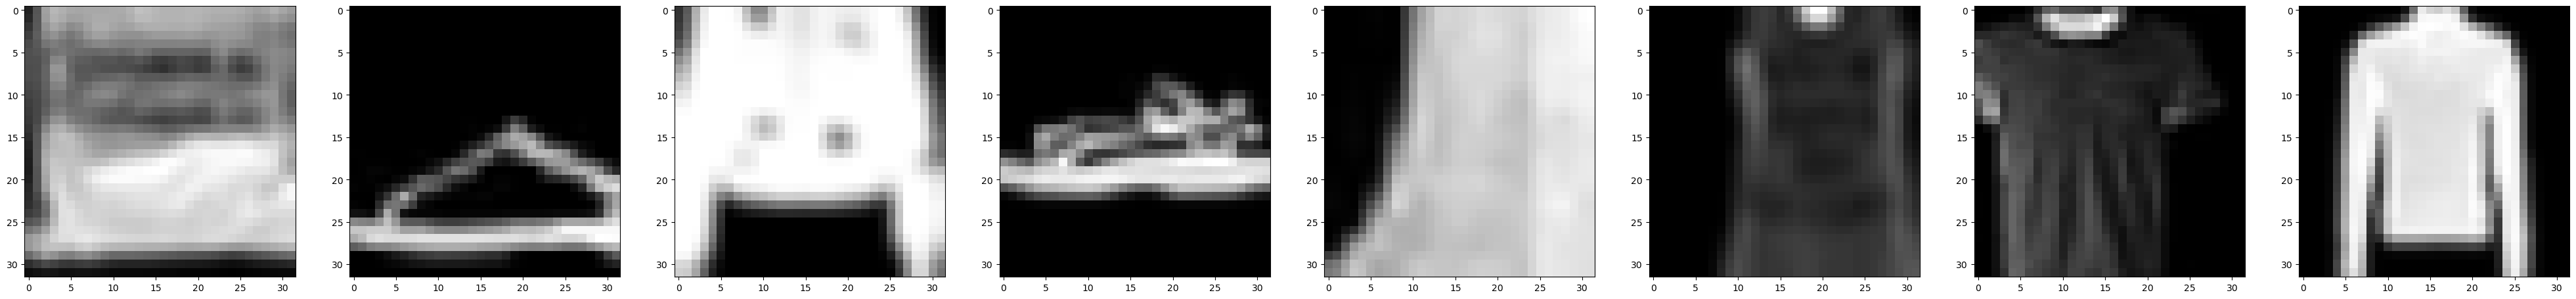

In [175]:
plot_imgs(x_j * torch.tensor(std)[None, :, None, None] + torch.tensor(mean)[None, :, None, None])